In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

#for NLP
import itertools
import nltk
from nltk.corpus import stopwords
import re
import collections

#specialized plots
import squarify
import plotly.express as px

#geoprocessing
import geopandas as gpd
import geopy

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
#read in twitter data
tw = pd.read_csv('twitter.csv')
tw.head(20)

id        time           created_at   from_user_name  \
0   1225314274983190529  1580972663  2020-02-06 07:04:23       agathardlp   
1   1225314561596809217  1580972731  2020-02-06 07:05:31       agathardlp   
2   1225317676748169216  1580973474  2020-02-06 07:17:54         dikanind   
3   1225317776065208320  1580973497  2020-02-06 07:18:17       skenxxieco   
4   1225317911419486210  1580973530  2020-02-06 07:18:50     markieemarxh   
5   1225318065249718274  1580973566  2020-02-06 07:19:26         ayk_dxix   
6   1225318355025817600  1580973635  2020-02-06 07:20:35     saggyarmpitt   
7   1225318560936779777  1580973684  2020-02-06 07:21:24      itspauly213   
8   1225318968593965056  1580973782  2020-02-06 07:23:02    ShaolinIvains   
9   1225318981063585792  1580973785  2020-02-06 07:23:05       spammy3245   
10  1225319632669728768  1580973940  2020-02-06 07:25:40  PrincessArmani0   
11  1225319668690362371  1580973949  2020-02-06 07:25:49         iimshade   
12  1225319746125451264  1580973967  2020-02-06 07:26:07       jsbustaman   
13  1225319858906202112  1580973994  2020-02-06 07:26:34  ZLnewsandvideos   
14  1225320072614490112  1580974045  2020-02-06 07:27:25  MikeSch95954709   
15  1225320234124562433  1580974083  2020-02-06 07:28:03         koobimin   
16  1225320241854472192  1580974085  2020-02-06 07:28:05       CAAChennai   
17  1225320268488486912  1580974092  2020-02-06 07:28:12       Richidoe13   
18  1225320601625100288  1580974171  2020-02-06 07:29:31         koobimin   
19  1225320787546116107  1580974215  2020-02-06 07:30:15         gettup10   

                                                 text filter_level  \
0   RT @ParaTiOnline: La diseñadora Agatha Ruiz de...         none   
1   RT @ParaTiOnline: La diseñadora Agatha Ruiz de...         none   
2   RT @MensHumor: Fashion Week has truly risen to...         none   
3   RT @BoF: Fashion month is upon us. But what do...         none   
4   RT @miloismybaby: Mark was supposed to attend ...         none   
5   RT @DaikiTsuneta: ✖️ N.HOOLYWOOD  ㅤ New York F...         none   
6   RT @Ninja: To walk a stage during New York fas...         none   
7   RT @ComplexSneakers: Nike does Fashion Week di...         none   
8   RT @ComplexSneakers: Nike does Fashion Week di...         none   
9   RT @Ninja: To walk a stage during New York fas...         none   
10  RT @_hxtr: 🚨🚨COTTON CLUB WEEK IS HERE! The 202...         none   
11  RT @Ninja: To walk a stage during New York fas...         none   
12  RT @enews: Tune in to E! for Everything New Yo...         none   
13  After having been back in Sweden for a little ...         none   
14  RT @enews: Tune in to E! for Everything New Yo...         none   
15  RT @ZLnewsandvideos: After having been back in...         none   
16  South India's biggest garment fair is here! Fa...         none   
17  RT @Ninja: To walk a stage during New York fas...         none   
18  zara attending paris and new york fashion week...         none   
19  RT @iamcardib: PARIS FASHION WEEK, IM HERE ! h...         none   

    possibly_sensitive  withheld_copyright  withheld_scope  truncated  \
0                  NaN                 NaN             NaN        NaN   
1                  NaN                 NaN             NaN        NaN   
2                  NaN                 NaN             NaN        NaN   
3                  0.0                 NaN             NaN        NaN   
4                  NaN                 NaN             NaN        NaN   
5                  NaN                 NaN             NaN        NaN   
6                  NaN                 NaN             NaN        NaN   
7                  0.0                 NaN             NaN        NaN   
8                  0.0                 NaN             NaN        NaN   
9                  NaN                 NaN             NaN        NaN   
10                 NaN                 NaN             NaN        NaN   
11                 NaN                 NaN             N

In [181]:
#see how many are null/what we should get rid of
tw.isna().sum()

id                                  0
time                                0
created_at                          0
from_user_name                      0
text                                0
filter_level                        0
possibly_sensitive             312281
withheld_copyright             607755
withheld_scope                 607755
truncated                      607755
retweet_count                       0
favorite_count                      0
lang                                0
to_user_name                   588122
in_reply_to_status_id          589683
quoted_status_id               585548
source                              0
location                       269260
lat                            605553
lng                            605553
from_user_id                        0
from_user_realname                 16
from_user_verified                  0
from_user_description          101058
from_user_url                  436311
from_user_profile_image_url         0
from_user_ut

In [3]:
#get rid of unnecessary columns
twe = tw.drop(['withheld_copyright', 'withheld_scope', 'truncated', 'to_user_name', 'in_reply_to_status_id', 'quoted_status_id', 'lat', 'lng', 'from_user_utcoffset', 'from_user_timezone', 'from_user_lang', 'from_user_withheld_scope','urls', 'urls_expanded', 'urls_followed', 'domains', 'HTTP status code'],axis = 1)

In [4]:
#read in language codes used in the twitter data set to convert 2 letter code to language
lang = pd.read_csv('language-codes_csv.csv')
lang.head()

alpha2    English
0     aa       Afar
1     ab  Abkhazian
2     ae    Avestan
3     af  Afrikaans
4     ak       Akan

In [5]:
#read in other twitter dataset collected by hashtag
twhash = pd.read_csv('twhash.csv')

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



In [6]:
#drop columns so that we match the two datasets
twhash.drop(['withheld_copyright', 'withheld_scope', 'truncated', 'to_user_name', 'in_reply_to_status_id', 'quoted_status_id', 'lat', 'lng', 'from_user_utcoffset', 'from_user_timezone', 'from_user_lang', 'from_user_withheld_scope'],axis = 1, inplace = True)

In [7]:
#create one larger twitter dataset
twittot = pd.concat([twe, twhash])

In [8]:
# get the language counts through a merge
twlangtot = twittot.merge(lang, left_on = 'lang', right_on = 'alpha2', how = 'outer')
twlangtot.English.value_counts()[:20]

English                    1303791
Thai                         80892
French                       46263
Japanese                     41208
Korean                       36376
Spanish; Castilian           28697
Italian                      20067
Portuguese                   16096
German                        9042
Polish                        7487
Turkish                       3676
Tagalog                       3519
Haitian; Haitian Creole       2523
Estonian                      2075
Danish                        1712
Swedish                       1596
Arabic                        1545
Dutch; Flemish                1507
Catalan; Valencian            1376
Hungarian                     1264
Name: English, dtype: int64

In [9]:
#language counts for our plot
langcounttot = twlangtot.English.value_counts()[:20]

In [10]:
#location counts to plot
loccounttot = twlangtot.location.value_counts()[:50]

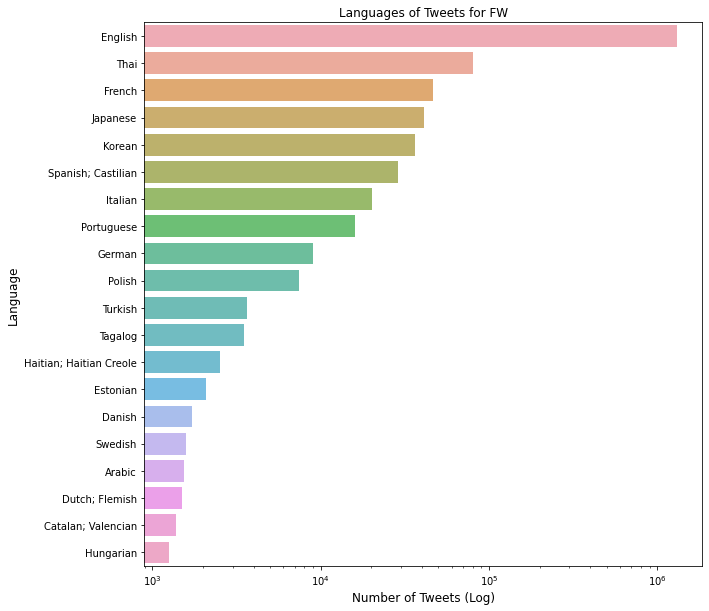

In [11]:
#plot the language counts on log scale
plt.figure(figsize=(10,10))
s = sns.barplot(langcounttot.values, langcounttot.index, alpha=0.8)
s.set_xscale('log') 
plt.title('Languages of Tweets for FW')
plt.ylabel('Language', fontsize=12)
plt.xlabel('Number of Tweets (Log)', fontsize=12)
plt.savefig("langtot.png")
plt.show()

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3611 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3619 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3632 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3648 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3607 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3624 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backe

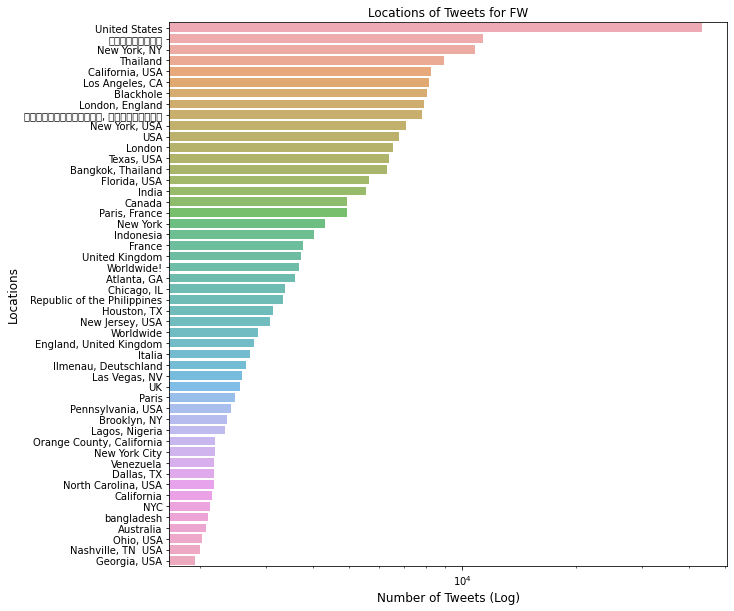

In [12]:
#plot locations on log scale
plt.figure(figsize=(10,10))
s = sns.barplot(loccounttot.values, loccounttot.index, alpha=0.8)
s.set_xscale('log') 
plt.title('Locations of Tweets for FW')
plt.ylabel('Locations', fontsize=12)
plt.xlabel('Number of Tweets (Log)', fontsize=12)
plt.savefig("locationtotal.png")
plt.show()

In [13]:
#get the days for each tweet to isolate during FW
twlangtot['created_at'] = pd.to_datetime(twlangtot['created_at'])
twlangtot['day'] = twlangtot['created_at'].dt.day

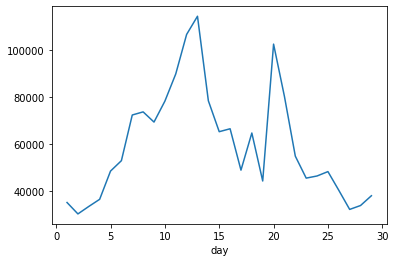

In [14]:
#all tweets by day
twlangtot.groupby(['day'])['id'].count().plot()

In [15]:
#Isolate the top languages
thai = twlangtot[twlangtot['English'] == 'Thai']
french = twlangtot[twlangtot['English'] == 'French']
japanese = twlangtot[twlangtot['English'] == 'Japanese']
korean = twlangtot[twlangtot['English'] == 'Korean']
spanish = twlangtot[twlangtot['English'] == 'Spanish; Castilian']
italian = twlangtot[twlangtot['English'] == 'Italian']
port = twlangtot[twlangtot['English'] == 'Portuguese']
tag = twlangtot[twlangtot['English'] == 'Tagalog']
english = twlangtot[twlangtot['English'] == 'English']

In [16]:
#tweets in each language by the day
thai_day = thai.groupby(['day'])['id'].count()
italian_day = italian.groupby(['day'])['id'].count()
english_day = english.groupby(['day'])['id'].count()
french_day = french.groupby(['day'])['id'].count()
spanish_day = spanish.groupby(['day'])['id'].count()
port_day = port.groupby(['day'])['id'].count()
japanese_day = japanese.groupby(['day'])['id'].count()
korean_day = korean.groupby(['day'])['id'].count()


In [155]:
#get csvs for external use
thai_day.to_csv('thai_day.csv')
italian_day.to_csv('italian_day.csv')
english_day.to_csv('english_day.csv')
french_day.to_csv('french_day.csv')
spanish_day.to_csv('spanish_day.csv')
port_day.to_csv('port_day.csv')
japanese_day.to_csv('japanese_day.csv')
korean_day.to_csv('korean_day.csv')

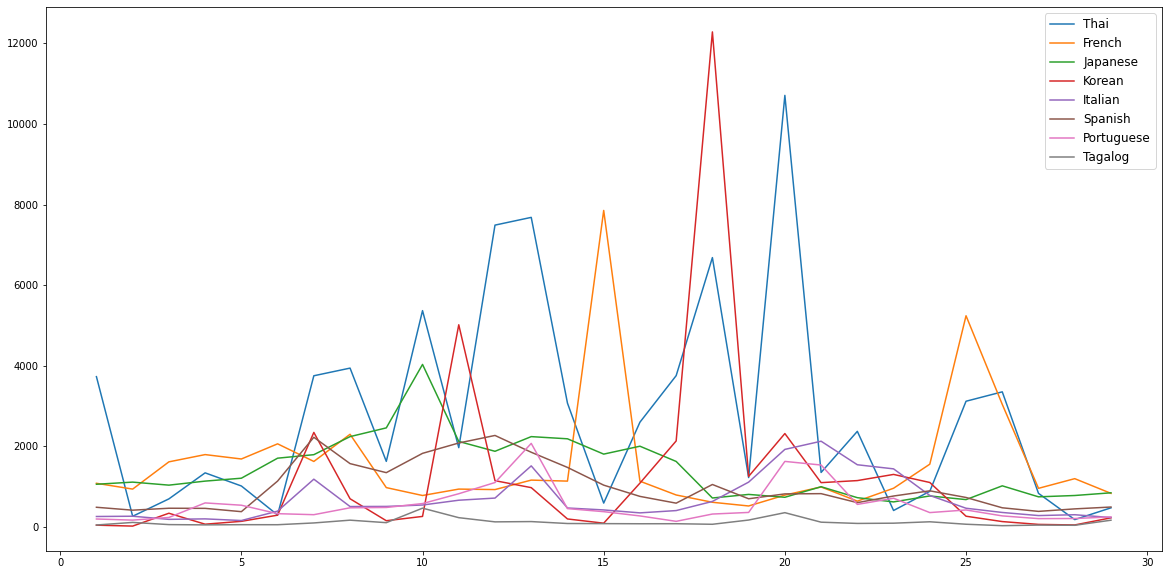

In [17]:
#compare languages by the day, exclude english as it overwhelms the graph
plt.figure(figsize = [20,10])
plt.plot(thai.groupby(['day'])['id'].count())
plt.plot(french.groupby(['day'])['id'].count())
plt.plot(japanese.groupby(['day'])['id'].count())
plt.plot(korean.groupby(['day'])['id'].count())
plt.plot(italian.groupby(['day'])['id'].count())
plt.plot(spanish.groupby(['day'])['id'].count())
plt.plot(port.groupby(['day'])['id'].count())
plt.plot(tag.groupby(['day'])['id'].count())
plt.legend(['Thai', 'French', 'Japanese', 'Korean', 'Italian', 'Spanish', 'Portuguese', 'Tagalog'], fontsize = 'large')

Text(0.5, 1.0, 'English')

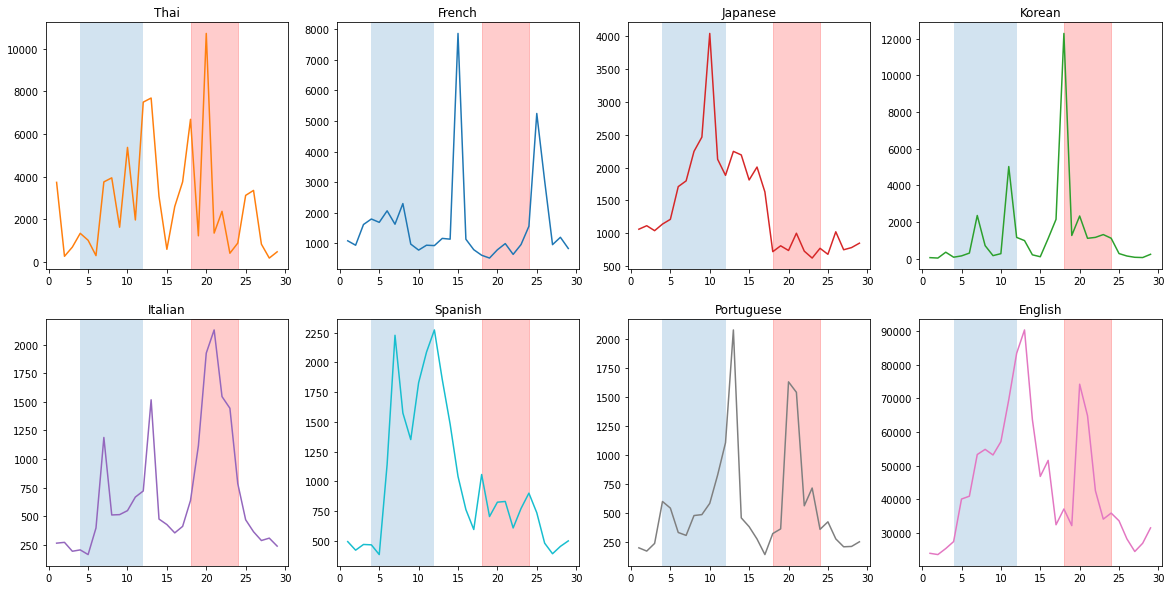

In [18]:
#same info but in subplots for each language, NYFW is blue, MFW is Red

fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs[0, 0].plot(thai.groupby(['day'])['id'].count(), 'tab:orange')
axs[0, 0].axvspan(4, 12, alpha = 0.2)
axs[0, 0].axvspan(18, 24, color = 'r', alpha = 0.2)
#axs[0, 0].axvline(x = 12, linestyle = '--')
#axs[0, 0].axvline(x = 18, linestyle = '--', c = 'r')
#axs[0, 0].axvline(x = 24, linestyle = '--', c = 'r')
axs[0, 0].set_title('Thai')

axs[0, 1].plot(french.groupby(['day'])['id'].count(), 'tab:blue')
axs[0, 1].axvspan(4, 12, alpha = 0.2)
axs[0, 1].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 1].set_title('French')

axs[0, 2].plot(japanese.groupby(['day'])['id'].count(), 'tab:red')
axs[0, 2].axvspan(4, 12, alpha = 0.2)
axs[0, 2].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 2].set_title('Japanese')

axs[0, 3].plot(korean.groupby(['day'])['id'].count(), 'tab:green')
axs[0, 3].axvspan(4, 12, alpha = 0.2)
axs[0, 3].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 3].set_title('Korean')

axs[1, 0].plot(italian.groupby(['day'])['id'].count(), 'tab:purple')
axs[1, 0].axvspan(4, 12, alpha = 0.2)
axs[1, 0].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 0].set_title('Italian')

axs[1, 1].plot(spanish.groupby(['day'])['id'].count(), 'tab:cyan')
axs[1, 1].axvspan(4, 12, alpha = 0.2)
axs[1, 1].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 1].set_title('Spanish')

axs[1, 2].plot(port.groupby(['day'])['id'].count(), 'tab:gray')
axs[1, 2].axvspan(4, 12, alpha = 0.2)
axs[1, 2].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 2].set_title('Portuguese')

axs[1, 3].plot(english.groupby(['day'])['id'].count(), 'tab:pink')
axs[1, 3].axvspan(4, 12, alpha = 0.2)
axs[1, 3].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 3].set_title('English')

I think this might be useful in terms of community too, just seeing if around a specific brand there’s been interaction in some particular language, and if this is a community, and why

In [19]:
#read in Brands data
mibrands = pd.read_csv('MIFW.csv', delimiter = ';')
nybrands = pd.read_csv('NYFW.csv', delimiter = ';')

In [41]:
mibrands.head()

BRAND     DAY   HOUR  \
0  GILBERTO CALZOLARI  19-feb  09:30   
1     MARCO RAMBALDI   19-feb  10:30   
2          CALCATERRA  19-feb  11:30   
3           ULTRÀCHIC  19-feb  12:30   
4     ARTHUR ARBESSER  19-feb  14:00   

                                          LOCATION  \
0  VIA DELLA LIBERAZIONE ANG. VIA MELCHIORRE GIOIA   
1                                   VIA TURATI, 34   
2                             VIA SAN GREGORIO, 29   
3                 PIAZZA DUOMO - SCALONE ARENGARIO   
4                     VIA GAUDENZIO FANTOLI, 15/1I   

                    INSTAGRAM                          NOTE          TWITTER  
0  gilbertocalzolari_official                           NaN     GilCalzolari  
1              marcorambaldi_                           NaN              NaN  
2                 calcaterrad                           NaN              NaN  
3          ultrachic_official                           NaN  ultrachicmilano  
4              arthurarbesser  fuori dalla circonvallazione              NaN

In [38]:
nybrands.head()

Brand     Day     Hour                             Location  \
0            MONSE   07-feb  6:00 PM                       30 Wall Street   
1          TOM FORD  07-feb      NaN                          Los Angeles   
2       RAG & BONE   07-feb  7:00 PM                       Skylight Vesey   
3        PRISCAVERA  07-feb  9:00 PM                                  NaN   
4  BRANDON MAXWELL   08-feb  8:00 PM  American Museum of Natural History    

        Instagram         Twitter  
0     monsemaison             NaN  
1         tomford         TOMFORD  
2      ragandbone        rag_bone  
3      priscavera             NaN  
4  brandonmaxwell  Brandonmaxwell

In [20]:
#drop unnecessary columns
nybrands.drop(['Num'], axis = 1, inplace = True)
mibrands.drop(['NOTE'], axis = 1, inplace = True)

In [21]:
#get the same column names
mibrands = mibrands.rename(columns = {'BRAND':'Brand', 'DAY':'Day', 'HOUR':'Hour', 'LOCATION':'Location', 'INSTAGRAM':'Instagram', 'TWITTER':'Twitter'})

In [156]:
#export for external use
nybrands.to_csv('nybrands.csv')
mibrands.to_csv('milanbrands.csv')

In [22]:
#create one brands dataset
brands = pd.concat([nybrands, mibrands])

In [46]:
brands.head()

Brand     Day     Hour                             Location  \
0            MONSE   07-feb  6:00 PM                       30 Wall Street   
1          TOM FORD  07-feb      NaN                          Los Angeles   
2       RAG & BONE   07-feb  7:00 PM                       Skylight Vesey   
3        PRISCAVERA  07-feb  9:00 PM                                  NaN   
4  BRANDON MAXWELL   08-feb  8:00 PM  American Museum of Natural History    

        Instagram         Twitter  
0     monsemaison             NaN  
1         tomford         TOMFORD  
2      ragandbone        rag_bone  
3      priscavera             NaN  
4  brandonmaxwell  Brandonmaxwell

In [47]:
brands.isna().sum()

Brand        104
Day          104
Hour         105
Location     149
Instagram    104
Twitter      139
dtype: int64

In [23]:
#clear out random empty rows
brands.dropna(subset = ["Brand"], inplace=True)

In [24]:
#get list of brands twitter handle
twbrands = brands.Twitter

In [25]:
twbrands.dropna(inplace = True)

In [90]:
twbrands.head()

1           TOMFORD
2          rag_bone
4    Brandonmaxwell
5    BadgleyMischka
9        snowxuegao
Name: Twitter, dtype: object

In [26]:
#create lowercase to standardize
brands_lw = [brand.lower() for brand in twbrands]

In [27]:
#turn thsi into a set
brandset = set(brands_lw)

In [82]:
brandset

{'_selfportrait_',
 'adamlippes',
 'agnonaofficial',
 'albertaferretti',
 'alexandramoura',
 'aliceandolivia',
 'anitacividini',
 'annakikiworld',
 'annasui',
 'anteprima_world',
 'area_nyc_',
 'armani',
 'atsu_nakashima',
 'badgleymischka',
 'bibhumohapatra',
 'bottegaveneta',
 'brandonmaxwell',
 'brockcollection',
 'christiancowan',
 'chromat_party',
 'coach',
 'cynthia_rowley',
 'dennisbasso',
 'eckhaus_latta',
 'emporioarmani',
 'ermannoscervino',
 'etroofficial',
 'fendi',
 'fenoelofficial',
 'ferragamo',
 'filausa                       fila_korea',
 'frankiemorello',
 'gabrielahearst',
 'gcdswear',
 'gilcalzolari',
 'gucci',
 'hellessyny',
 'helmutlang',
 'houseofherrera',
 'hugoboss',
 'jasonwu',
 'jilsanderpr',
 'jonathancohenstudio',
 'jonathansimkhai',
 'katespadeny',
 'khaite_ny',
 'kimshuistudio',
 'laquansmith',
 'lbofficialpage',
 'lela_rose',
 'longchamp',
 'luisabeccaria',
 'marchesafashion',
 'marcjacobs',
 'marniofficial',
 'maxmara',
 'michaelkors',
 'missoni',
 'mon

In [28]:
#clean the mentions column
twlangtot['ment'] = twlangtot['mentions'].str.split(';')

In [29]:
#context of a tweet
text = twlangtot.text

In [30]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(txt)).split())

In [31]:
#apply above function to our tweets
all_tweets = [remove_url(tweet) for tweet in text]
all_tweets[:5]

['RT ParaTiOnline La diseadora Agatha Ruiz de la Prada present una coleccin moderna y llena de color en el Fashion Week de Madrid Te la mostramos en esta nota agatharuizdelaprada madrid mfw 7',
 'RT ParaTiOnline La diseadora Agatha Ruiz de la Prada present una coleccin moderna y llena de color en el Fashion Week de Madrid Te la mostramos en esta nota agatharuizdelaprada madrid mfw 1',
 'Nos os perdis hasta el da 9 la SFWMadrid en un espacio diferente talentgardenes Sustainable Fashion Week abre la puerta al trabajo de grandes marcas de ropa que a la vez luchan contra el cambio climtico Da 9 en alcorcon un queenupcycling a cargo de AltrapoLAB',
 'RT nurialamuniz Nos os perdis hasta el da 9 la SFWMadrid en un espacio diferente talentgardenes Sustainable Fashion Week abre la puerta al trabajo de grandes marcas de ropa que a la vez luchan contra el cambio climtico Da 9 en alcorcon un queenupcycling a cargo de AltrapoLAB',
 'RT PEFCSpain De esto disfrutaremos en la Sustainable Fashion Week 

In [32]:
#split the tweet into individual words
words = [tweet.lower().split() for tweet in all_tweets]
words[:2]

[['rt',
  'parationline',
  'la',
  'diseadora',
  'agatha',
  'ruiz',
  'de',
  'la',
  'prada',
  'present',
  'una',
  'coleccin',
  'moderna',
  'y',
  'llena',
  'de',
  'color',
  'en',
  'el',
  'fashion',
  'week',
  'de',
  'madrid',
  'te',
  'la',
  'mostramos',
  'en',
  'esta',
  'nota',
  'agatharuizdelaprada',
  'madrid',
  'mfw',
  '7'],
 ['rt',
  'parationline',
  'la',
  'diseadora',
  'agatha',
  'ruiz',
  'de',
  'la',
  'prada',
  'present',
  'una',
  'coleccin',
  'moderna',
  'y',
  'llena',
  'de',
  'color',
  'en',
  'el',
  'fashion',
  'week',
  'de',
  'madrid',
  'te',
  'la',
  'mostramos',
  'en',
  'esta',
  'nota',
  'agatharuizdelaprada',
  'madrid',
  'mfw',
  '1']]

In [33]:
# List of all words across tweets
all_words = list(itertools.chain(*words))

# Create counter
word_counts = collections.Counter(all_words)

word_counts.most_common(15)

[('fashion', 1354484),
 ('rt', 991740),
 ('the', 785921),
 ('to', 602379),
 ('style', 532704),
 ('week', 502932),
 ('on', 444874),
 ('i', 393176),
 ('out', 357199),
 ('all', 347459),
 ('so', 342465),
 ('check', 335440),
 ('im', 334764),
 ('good', 331429),
 ('share', 320583)]

In [34]:
#put this info into a DF
clean_tweets = pd.DataFrame(word_counts.most_common(500),
                             columns=['words', 'count'])

clean_tweets.head()

words    count
0  fashion  1354484
1       rt   991740
2      the   785921
3       to   602379
4    style   532704

In [35]:
#get stopwords for NLP
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnhughes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['in',
 'hers',
 'him',
 'just',
 'off',
 'from',
 'your',
 'than',
 'before',
 'herself']

In [37]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words]

tweets_nsw[0]

['rt',
 'parationline',
 'la',
 'diseadora',
 'agatha',
 'ruiz',
 'de',
 'la',
 'prada',
 'present',
 'una',
 'coleccin',
 'moderna',
 'llena',
 'de',
 'color',
 'en',
 'el',
 'fashion',
 'week',
 'de',
 'madrid',
 'te',
 'la',
 'mostramos',
 'en',
 'esta',
 'nota',
 'agatharuizdelaprada',
 'madrid',
 'mfw',
 '7']

In [38]:
#get most common words without stopwords
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('fashion', 1354484),
 ('rt', 991740),
 ('style', 532704),
 ('week', 502932),
 ('check', 335440),
 ('im', 334764),
 ('good', 331429),
 ('share', 320583),
 ('items', 317714),
 ('poshmark', 316561),
 ('loving', 316025),
 ('shopmycloset', 315306),
 ('poshmarkapp', 314818),
 ('nyfw', 204550),
 ('show', 182227)]

In [39]:
#turn these into DF
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(10000),
                             columns=['words', 'count'])

In [58]:
clean_tweets_nsw.iloc[15:35, :]

words   count
15             2020  166793
16             lisa  154413
17              new  146788
18            milan  144626
19              mfw  136041
20             york   98500
21            paris   94557
22        blackpink   88120
23             love   83906
24            prada   83076
25  ygofficialblink   71098
26        loungefly   68806
27    originalfunko   68563
28           beauty   66607
29            coach   65293
30           runway   64355
31               de   59572
32           follow   58916
33             look   55743
34               la   54248

In [40]:
cln = clean_tweets_nsw[clean_tweets_nsw['words'].isin(brandset)]

In [59]:
cln.shape

(41, 2)

In [41]:
thai_tweets = [remove_url(tweet) for tweet in thai.text]

thaiwords = [tweet.lower().split() for tweet in thai_tweets]

# List of all words across tweets
thai_words = list(itertools.chain(*thaiwords))

thai_counts = collections.Counter(thai_words)

thai_tweets = pd.DataFrame(thai_counts.most_common(10000),
                             columns=['words', 'count'])

clean_thai = thai_tweets[thai_tweets['words'].isin(brandset)]

clean_thai.shape

(14, 2)

In [42]:
english_tweets = [remove_url(tweet) for tweet in english.text]

englishwords = [tweet.lower().split() for tweet in english_tweets]

# List of all words across tweets
english_words = list(itertools.chain(*englishwords))

# Create counter
english_counts = collections.Counter(english_words)

english_tweets = pd.DataFrame(english_counts.most_common(10000),
                             columns=['words', 'count'])

clean_english = english_tweets[english_tweets['words'].isin(brandset)]

clean_english.shape

(44, 2)

In [43]:
french_tweets = [remove_url(tweet) for tweet in french.text]

frenchwords = [tweet.lower().split() for tweet in french_tweets]

# List of all words across tweets
french_words = list(itertools.chain(*frenchwords))

french_counts = collections.Counter(french_words)

french_tweets = pd.DataFrame(french_counts.most_common(10000),
                             columns=['words', 'count'])

clean_french = french_tweets[french_tweets['words'].isin(brandset)]

clean_french.shape

(19, 2)

In [44]:
italian_tweets = [remove_url(tweet) for tweet in italian.text]

italianwords = [tweet.lower().split() for tweet in italian_tweets]

# List of all words across tweets
italian_words = list(itertools.chain(*italianwords))

italian_counts = collections.Counter(italian_words)

italian_tweets = pd.DataFrame(italian_counts.most_common(10000),
                             columns=['words', 'count'])

clean_italian = italian_tweets[italian_tweets['words'].isin(brandset)]

clean_italian.shape

(37, 2)

In [45]:
japanese_tweets = [remove_url(tweet) for tweet in japanese.text]

japanesewords = [tweet.lower().split() for tweet in japanese_tweets]

# List of all words across tweets
japanese_words = list(itertools.chain(*japanesewords))

japanese_counts = collections.Counter(japanese_words)

japanese_tweets = pd.DataFrame(japanese_counts.most_common(10000),
                             columns=['words', 'count'])

clean_japanese = japanese_tweets[japanese_tweets['words'].isin(brandset)]

clean_japanese.shape

(22, 2)

In [46]:
korean_tweets = [remove_url(tweet) for tweet in korean.text]

koreanwords = [tweet.lower().split() for tweet in korean_tweets]

# List of all words across tweets
korean_words = list(itertools.chain(*koreanwords))

korean_counts = collections.Counter(korean_words)

korean_tweets = pd.DataFrame(korean_counts.most_common(10000),
                             columns=['words', 'count'])

clean_korean = korean_tweets[korean_tweets['words'].isin(brandset)]

clean_korean.shape

(9, 2)

In [47]:
spanish_tweets = [remove_url(tweet) for tweet in spanish.text]

spanishwords = [tweet.lower().split() for tweet in spanish_tweets]

# List of all words across tweets
spanish_words = list(itertools.chain(*spanishwords))

spanish_counts = collections.Counter(spanish_words)

spanish_tweets = pd.DataFrame(spanish_counts.most_common(10000),
                             columns=['words', 'count'])

clean_spanish = spanish_tweets[spanish_tweets['words'].isin(brandset)]

clean_spanish.shape

(30, 2)

In [48]:
port_tweets = [remove_url(tweet) for tweet in port.text]

portwords = [tweet.lower().split() for tweet in port_tweets]

# List of all words across tweets
port_words = list(itertools.chain(*portwords))

port_counts = collections.Counter(port_words)

port_tweets = pd.DataFrame(port_counts.most_common(10000),
                             columns=['words', 'count'])

clean_port = port_tweets[port_tweets['words'].isin(brandset)]

clean_port.shape

(21, 2)

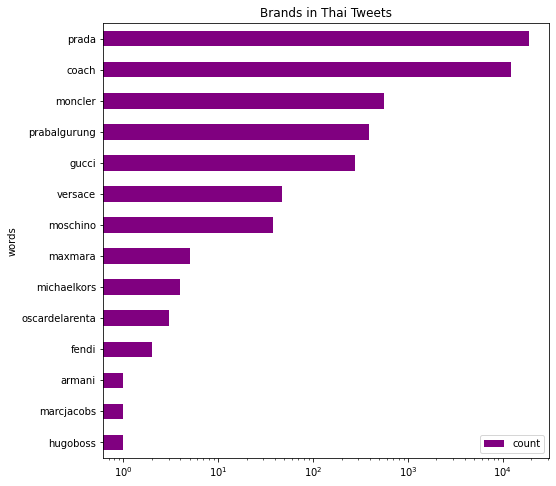

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_thai.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Thai Tweets")
ax.set_xscale('log')

plt.show()

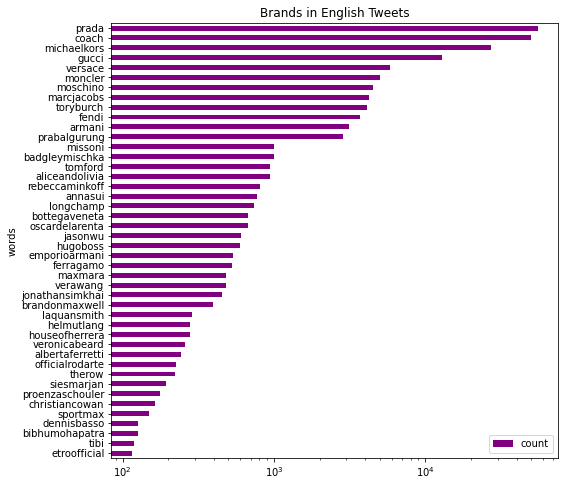

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_english.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in English Tweets")
ax.set_xscale('log')

plt.show()

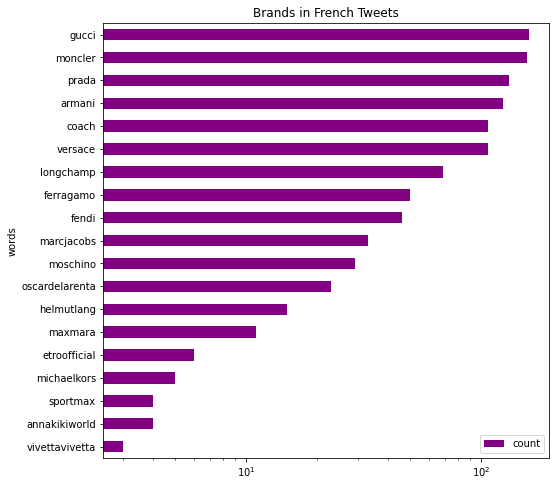

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_french.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in French Tweets")
ax.set_xscale('log')

plt.show()

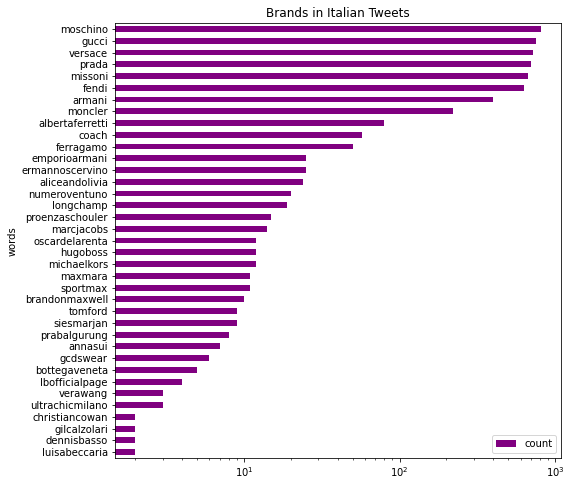

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_italian.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Italian Tweets")
ax.set_xscale('log')

plt.show()

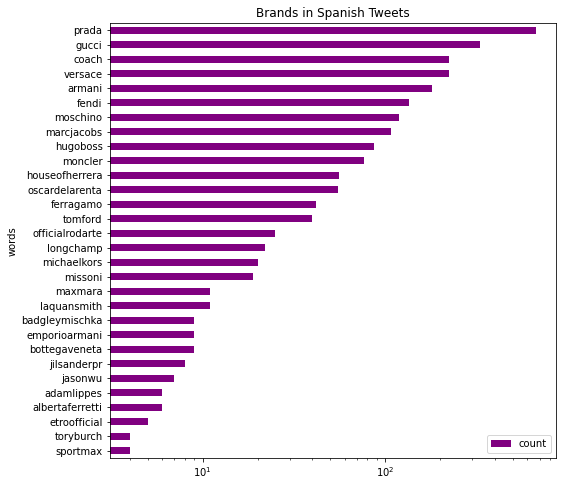

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_spanish.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Spanish Tweets")
ax.set_xscale('log')

plt.show()

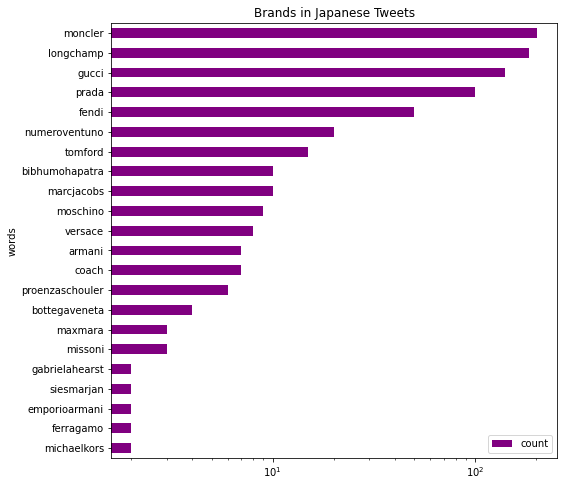

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_japanese.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Japanese Tweets")
ax.set_xscale('log')

plt.show()

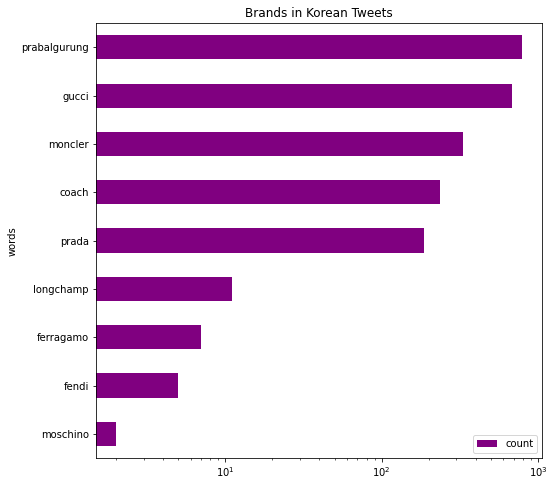

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_korean.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Korean Tweets")
ax.set_xscale('log')

plt.show()

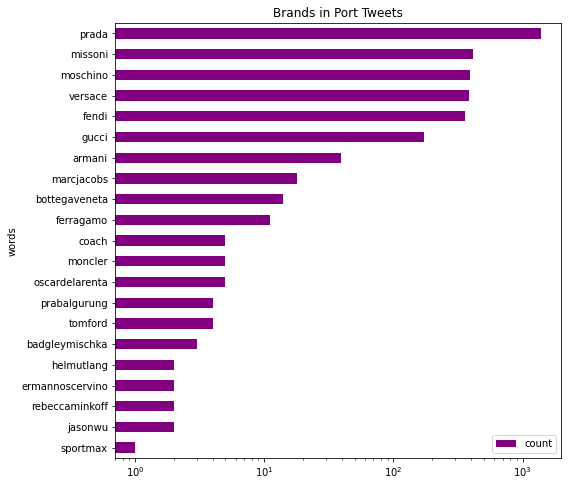

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_port.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Port Tweets")
ax.set_xscale('log')

plt.show()

In [86]:
clean_thai.head()

words  count    lcount
9           prada  18931  9.848556
13          coach  12146  9.404755
190       moncler    555  6.318968
223  prabalgurung    386  5.955837
261         gucci    276  5.620401

In [84]:
clean_thai.dtypes

words    object
count     int64
dtype: object

In [76]:
clean_thai['lcount'] = np.log(clean_thai['count'])
clean_french['lcount'] = np.log(clean_french['count'])
clean_italian['lcount'] = np.log(clean_italian['count'])
clean_english['lcount'] = np.log(clean_english['count'])
clean_spanish['lcount'] = np.log(clean_spanish['count'])
clean_japanese['lcount'] = np.log(clean_japanese['count'])
clean_korean['lcount'] = np.log(clean_korean['count'])
clean_port['lcount'] = np.log(clean_port['count'])


/Users/johnhughes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [93]:
clean_thai.head(15)

words  count    lcount
9              prada  18931  9.848556
13             coach  12146  9.404755
190          moncler    555  6.318968
223     prabalgurung    386  5.955837
261            gucci    276  5.620401
470          versace     47  3.850148
504         moschino     38  3.637586
1009         maxmara      5  1.609438
1105     michaelkors      4  1.386294
1220  oscardelarenta      3  1.098612
1396           fendi      2  0.693147
1661        hugoboss      1  0.000000
1786      marcjacobs      1  0.000000
1821          armani      1  0.000000

In [125]:
clean_thai.to_csv('thai_brands.csv')

In [126]:
clean_korean.to_csv('korean_brands.csv')

In [149]:
clean_japanese.to_csv('japanese_brands.csv')
clean_italian.to_csv('italian_brands.csv')
clean_spanish.to_csv('spanish_brands.csv')
clean_english.to_csv('english_brands.csv')
clean_french.to_csv('french_brands.csv')
clean_port.to_csv('port_brands.csv')

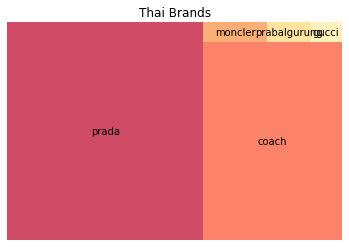

In [57]:
squarify.plot(sizes=clean_thai.iloc[:5, :]['count'], label=clean_thai.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Thai Brands')
plt.show()

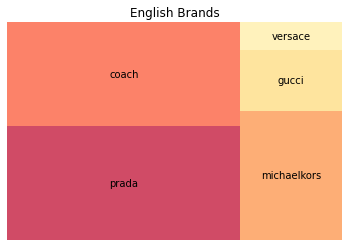

In [58]:
squarify.plot(sizes=clean_english.iloc[:5, :]['count'], label=clean_english.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('English Brands')
plt.show()

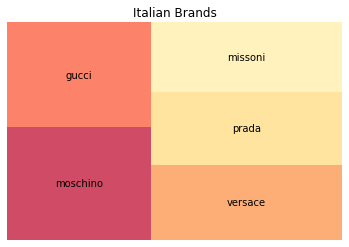

In [59]:
squarify.plot(sizes=clean_italian.iloc[:5, :]['count'], label=clean_italian.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Italian Brands')
plt.show()

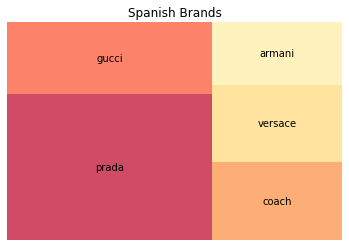

In [60]:
squarify.plot(sizes=clean_spanish.iloc[:5, :]['count'], label=clean_spanish.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Spanish Brands')
plt.show()

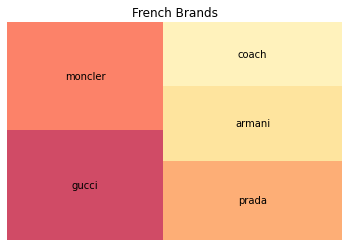

In [61]:
squarify.plot(sizes=clean_french.iloc[:5, :]['count'], label=clean_french.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('French Brands')
plt.show()

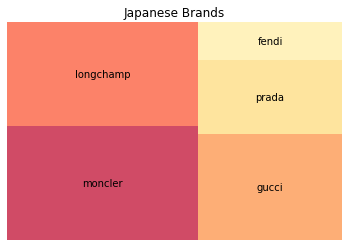

In [62]:
squarify.plot(sizes=clean_japanese.iloc[:5, :]['count'], label=clean_japanese.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Japanese Brands')
plt.show()

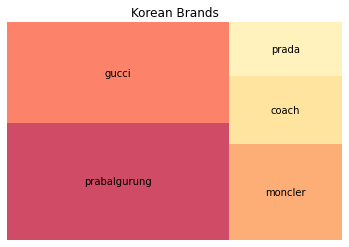

In [63]:
squarify.plot(sizes=clean_korean.iloc[:5, :]['count'], label=clean_korean.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Korean Brands')
plt.show()

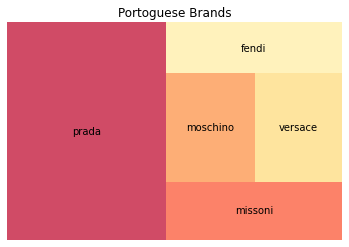

In [64]:
squarify.plot(sizes=clean_port.iloc[:5, :]['count'], label=clean_port.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Portoguese Brands')
plt.show()

In [65]:
th = pd.read_csv('thai_brands_im.csv')

In [138]:
th.head()

words    fw  count
0         prada   mfw  18931
1         coach  nyfw  12146
2       moncler   mfw    555
3  prabalgurung  nyfw    386
4         gucci   mfw    276

In [66]:
fig = px.treemap(th, path = ['fw', 'words'], values = 'count', width=900, height=800, title = 'Thai Brands')
fig.show()
#fig.write_html("th.html")

In [67]:
fig = px.bar(clean_thai, x='words', y='count')
fig.show()

In [68]:
langtree = pd.read_csv('language_brands_work.csv')
langtree.head()

brand  count     lang    fw
0        prada  55056  english   mfw
1        coach  50121  english  nyfw
2  michaelkors  27175  english  nyfw
3        gucci  12859  english   mfw
4      versace   5823  english   mfw

In [69]:
fig = px.treemap(langtree, path = ['fw', 'lang', 'brand'], values = 'count', width=900, height=800, title = 'Brands')
fig.show()

In [70]:
fig = px.treemap(langtree, path = ['lang', 'fw', 'brand'], values = 'count', width=900, height=800, title = 'Brands')
fig.show()

In [71]:
langtree2 = pd.read_csv('language_brands_work_noeng.csv')

In [72]:
fig = px.treemap(langtree2, path = ['fw', 'lang', 'brand'], values = 'count', width=900, height=800, title = 'Brands')
fig.show()

In [73]:
fig = px.treemap(langtree2, path = ['lang', 'fw', 'brand'], values = 'count', width=900, height=800, title = 'Brands')
fig.show()
#fig.write_html("brnd.html")

In [74]:
langtree3 = pd.read_csv('language_noeng_5.csv')

In [75]:
fig = px.treemap(langtree3, path = ['fw', 'lang', 'brand'], values = 'count', width=900, height=800, title = 'Brands', color = 'lang')
fig.show()

In [76]:
fig = px.treemap(langtree3, path = ['lang', 'fw', 'brand'], values = 'count', width=1000, height=1000, title = 'Brands')
fig.show()
#fig.write_html("brnd2.html")

In [77]:
fig = px.treemap(langtree3, path = ['lang', 'fw', 'brand'], values = 'count', width=1000, height=1000, title = 'Brands', color = 'brand')
fig.show()
#fig.write_html("brnd2.html")

In [78]:
fig = px.treemap(langtree3, path = ['brand', 'lang'], values = 'count', width=1000, height=1000, title = 'Brands')
fig.show()
#fig.write_html("brnd3.html")

In [79]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.1)

In [104]:
twlangtot['geolocation'] = twlangtot['location'].apply(geocode)
twlangtot['point'] = twlangtot['geolocation'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('mexico',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 381, in _make_request
    self._validate_conn(conn)
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 976, in _validate_conn
    conn.connect()
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connection.py", line 370, in connect
    ssl_context=context,
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/util/ssl_.py", line 377, in ssl_wrap_socket
    return context.wrap_socket(sock, server_hostname=server_hostname)
  File "/Users/johnhughes/miniconda3/lib/python3.6/ssl.py", line 401, in wrap_socket
    _context=self, _session=session)
  File "/Users/johnhughes/miniconda3/lib/python3.6/ssl.py", line 808, in __init__
    self.do_handshake()
  File "/Users/johnhughes/miniconda3/lib

RateLimiter caught an error, retrying (1/2 tries). Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Ituzaingó Centro, Argentina',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self.

RateLimiter swallowed an error after 2 retries. Called with (*('Ituzaingó Centro, Argentina',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._so

RateLimiter caught an error, retrying (1/2 tries). Called with (*('3𝗰𝗶𝘁𝘀 3𝗿𝘁𝘀 16𝗳𝗮𝘃𝘀༄',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.rec

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Barcelona, España',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 381, in _make_request
    self._validate_conn(conn)
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 976, in _validate_conn
    conn.connect()
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connection.py", line 370, in connect
    ssl_context=context,
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/util/ssl_.py", line 377, in ssl_wrap_socket
    return context.wrap_socket(sock, server_hostname=server_hostname)
  File "/Users/johnhughes/miniconda3/lib/python3.6/ssl.py", line 401, in wrap_socket
    _context=self, _session=session)
  File "/Users/johnhughes/miniconda3/lib/python3.6/ssl.py", line 808, in __init__
    self.do_handshake()
  File "/Users/johnhughes/min

KeyboardInterrupt: 

In [106]:
testtweet = twlangtot.iloc[:20, :]

In [107]:
testtweet['geolocation'] = testtweet['location'].apply(geocode)
testtweet['point'] = testtweet['geolocation'].apply(lambda loc: tuple(loc.point) if loc else None)

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
t = testtweet[['id', 'lang', 'location', 'English', 'day', 'geolocation', 'point']]
t.head(10)

id lang                       location             English  day  \
0  1.225314e+18   es  Madrid, Milano, París, Bogotá  Spanish; Castilian  6.0   
1  1.225315e+18   es  Madrid, Milano, París, Bogotá  Spanish; Castilian  6.0   
2  1.225324e+18   es    Madrid, Comunidad de Madrid  Spanish; Castilian  6.0   
3  1.225327e+18   es    Madrid, Comunidad de Madrid  Spanish; Castilian  6.0   
4  1.225332e+18   es  Ventura Rodríguez 22 - Madrid  Spanish; Castilian  6.0   
5  1.225332e+18   es  Ventura Rodríguez 22 - Madrid  Spanish; Castilian  6.0   
6  1.225332e+18   es                 Madrid, España  Spanish; Castilian  6.0   
7  1.225332e+18   es                 Madrid, España  Spanish; Castilian  6.0   
8  1.225342e+18   es                            NaN  Spanish; Castilian  6.0   
9  1.225351e+18   es   Ventura Rodríguez 17, Madrid  Spanish; Castilian  6.0   

                                         geolocation  \
0                                               None   
1                                               None   
2  (Madrid, Área metropolitana de Madrid y Corred...   
3  (Madrid, Área metropolitana de Madrid y Corred...   
4  (Ventura Rodríguez, Calle de la Princesa, Univ...   
5  (Ventura Rodríguez, Calle de la Princesa, Univ...   
6  (Madrid, Área metropolitana de Madrid y Corred...   
7  (Madrid, Área metropolitana de Madrid y Corred...   
8  (Nanno, Comunità della Val di Non, Provincia d...   
9  (Ventura Rodríguez, La Herrería, San Lorenzo d...   

                           point  
0                           None  
1                           None  
2  (40.4167047, -3.7035825, 0.0)  
3  (40.4167047, -3.7035825, 0.0)  
4  (40.4267613, -3.7132931, 0.0)  
5  (40.4267613, -3.7132931, 0.0)  
6  (40.4167047, -3.7035825, 0.0)  
7  (40.4167047, -3.7035825, 0.0)  
8  (46.3144754, 11.0480288, 0.0)  
9  (40.5913977, -4.1458064, 0.0)

In [82]:
loctweets = twlangtot.dropna(subset = ["location"])

In [83]:
loctweets.shape

(1009241, 30)

In [115]:
loctweets['geolocation'] = loctweets['location'].apply(geocode)
loctweets['point'] = loctweets['geolocation'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

RateLimiter swallowed an error after 2 retries. Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Ituzaingó Centro, Argentina',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self.

RateLimiter caught an error, retrying (0/2 tries). Called with (*('3𝗰𝗶𝘁𝘀 3𝗿𝘁𝘀 16𝗳𝗮𝘃𝘀༄',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.rec

RateLimiter swallowed an error after 2 retries. Called with (*('3𝗰𝗶𝘁𝘀 3𝗿𝘁𝘀 16𝗳𝗮𝘃𝘀༄',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

KeyboardInterrupt: 

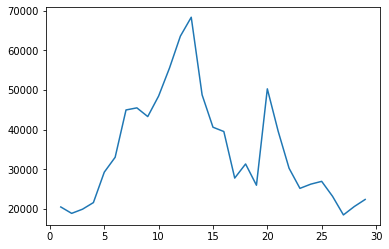

In [118]:
plt.plot(loctweets.groupby(['day'])['id'].count())

In [84]:
nyfwloc = loctweets[(loctweets['day'] < 14) & (loctweets['day'] > 3)]

In [85]:
mfwloc = loctweets[(loctweets['day'] < 26) & (loctweets['day'] > 16)]

In [86]:
mfwtest = mfwloc.sample(frac = 0.1, random_state = 1)

In [99]:
nyfwtest = nyfwloc.sample(frac = 0.1, random_state = 1)

In [100]:
nyfwtest.shape

(45339, 30)

In [126]:
nyfwloc.to_csv('nyfwloc.csv')
mfwloc.to_csv('mfwloc.csv')

In [88]:
#run once and export to csv to reupload for future, runtime > 8 hours
mfwtest['geolocation'] = mfwtest['location'].apply(geocode)
mfwtest['point'] = mfwtest['geolocation'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('7/14/13',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter swallowed an error after 2 retries. Called with (*('7/14/13',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fi

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('我的梦✨',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fi

RateLimiter swallowed an error after 2 retries. Called with (*('我的梦✨',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1 AU',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fi

RateLimiter caught an error, retrying (0/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter swallowed an error after 2 retries. Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fil

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('𝑮𝑶𝑻7, 𝑿1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)


RateLimiter swallowed an error after 2 retries. Called with (*('𝑮𝑶𝑻7, 𝑿1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  F

RateLimiter caught an error, retrying (1/2 tries). Called with (*('In yr head',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b

RateLimiter caught an error, retrying (0/2 tries). Called with (*('C-Town, Mississippi',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.re

RateLimiter swallowed an error after 2 retries. Called with (*('C-Town, Mississippi',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Ituzaingó Centro, Argentina',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self.

RateLimiter caught an error, retrying (0/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter swallowed an error after 2 retries. Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fil

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('7/14/13',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter swallowed an error after 2 retries. Called with (*('7/14/13',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fi

RateLimiter caught an error, retrying (1/2 tries). Called with (*('127.0.0.1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('16/1/2014',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter swallowed an error after 2 retries. Called with (*('16/1/2014',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

In [91]:
mfwtest[['latitude', 'longitude', 'altitude']] = pd.DataFrame(mfwtest['point'].tolist(), index=mfwtest.index)

In [93]:
#%pip install folium
import folium
from folium.plugins import FastMarkerCluster

In [92]:
mfwtest.latitude.isnull().sum()

5426

In [94]:
mfwtest = mfwtest[pd.notnull(mfwtest["latitude"])]

In [101]:
mfwtest.to_csv('mfwgeo')

In [97]:
folium_map = folium.Map(location=[59.338315,18.089960],
                        zoom_start=4,
                        tiles='cartodbpositron')


FastMarkerCluster(data=list(zip(mfwtest['latitude'].values,  mfwtest['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [98]:
folium_map.save("map1.html")

In [102]:
#run once and export to csv to reupload for future, runtime > 8 hours
nyfwtest['geolocation'] = nyfwtest['location'].apply(geocode)
nyfwtest['point'] = nyfwtest['geolocation'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('California via Detroit',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock

RateLimiter swallowed an error after 2 retries. Called with (*('California via Detroit',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.re

RateLimiter caught an error, retrying (1/2 tries). Called with (*('11.11.19💗',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('10.08.19',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)


RateLimiter caught an error, retrying (0/2 tries). Called with (*('1/21/20💖🙏🏽',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b

RateLimiter swallowed an error after 2 retries. Called with (*('1/21/20💖🙏🏽',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Miami th l',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 381, in _make_request
    self._validate_conn(conn)
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 976, in _validate_conn
    conn.connect()
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connection.py", line 370, in connect
    ssl_context=context,
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/util/ssl_.py", line 377, in ssl_wrap_socket
    return context.wrap_socket(sock, server_hostname=server_hostname)
  File "/Users/johnhughes/miniconda3/lib/python3.6/ssl.py", line 401, in wrap_socket
    _context=self, _session=session)
  File "/Users/johnhughes/miniconda3/lib/python3.6/ssl.py", line 808, in __init__
    self.do_handshake()
  File "/Users/johnhughes/miniconda3

RateLimiter caught an error, retrying (1/2 tries). Called with (*('7 0 2 ⭐',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('192.168.1.1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(

RateLimiter caught an error, retrying (0/2 tries). Called with (*('NY🍎 to AZ🌵',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b

RateLimiter swallowed an error after 2 retries. Called with (*('NY🍎 to AZ🌵',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('▲  NY/NC 🛩 Las Vegas',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.r

RateLimiter swallowed an error after 2 retries. Called with (*('▲  NY/NC 🛩 Las Vegas',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv

RateLimiter caught an error, retrying (1/2 tries). Called with (*('NJ-LA-NJ-NC',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(

RateLimiter caught an error, retrying (0/2 tries). Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

RateLimiter swallowed an error after 2 retries. Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into

RateLimiter caught an error, retrying (1/2 tries). Called with (*('11.9.19',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('10 on the floor',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

RateLimiter swallowed an error after 2 retries. Called with (*('10 on the floor',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into

RateLimiter caught an error, retrying (1/2 tries). Called with (*('New York, NY/ Los Angeles',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._s

RateLimiter caught an error, retrying (0/2 tries). Called with (*("BP's area",), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('27/10/2019🇮🇹',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into

RateLimiter swallowed an error after 2 retries. Called with (*('27/10/2019🇮🇹',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter caught an error, retrying (1/2 tries). Called with (*('예,태,강단',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('✨🍊 1 9 9 4 🍊✨',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_int

RateLimiter swallowed an error after 2 retries. Called with (*('✨🍊 1 9 9 4 🍊✨',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b

RateLimiter caught an error, retrying (1/2 tries). Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

RateLimiter caught an error, retrying (0/2 tries). Called with (*('#Orange County., CA & #AZ',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._s

RateLimiter swallowed an error after 2 retries. Called with (*('#Orange County., CA & #AZ',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

In [105]:
nyfwtest[['latitude', 'longitude', 'altitude']] = pd.DataFrame(nyfwtest['point'].tolist(), index=nyfwtest.index)

In [109]:
nyfwtest.to_csv('geonyfw')

In [107]:
nyfwtest.latitude.isnull().sum()

6956

In [108]:
nyfwtest = nyfwtest[pd.notnull(nyfwtest["latitude"])]

In [110]:
nyfwtest.shape

(38383, 35)

In [111]:
folium_mapny = folium.Map(location=[59.338315,18.089960],
                        zoom_start=4,
                        tiles='cartodbpositron')


FastMarkerCluster(data=list(zip(nyfwtest['latitude'].values,  nyfwtest['longitude'].values))).add_to(folium_mapny)
folium.LayerControl().add_to(folium_mapny)
folium_mapny

In [112]:
folium_mapny.save("mapNY.html")

In [118]:
from folium.plugins import HeatMap
heat = folium.Map(location=[59.338315,18.089960],
                        zoom_start=4,
                        tiles='cartodbpositron')

nyfwtest['count'] = 1
#HeatMap(data=list(zip(nyfwtest['latitude'].values,  nyfwtest['longitude'].values))).add_to(heat)
HeatMap(data=nyfwtest[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(heat)
#folium.LayerControl().add_to(heat)
heat

In [124]:
heatm = folium.Map(location=[59.338315,18.089960],
                        zoom_start=2,
                        tiles='cartodbpositron')

mfwtest['count'] = 1
#HeatMap(data=list(zip(nyfwtest['latitude'].values,  nyfwtest['longitude'].values))).add_to(heat)
HeatMap(data=mfwtest[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(heatm)
#folium.LayerControl().add_to(heat)
heatm

In [126]:
#heatm.add_child(folium.ClickForMarker(popup='Potential Location'))

In [127]:
df_day_list = []
for day in mfwtest.day.sort_values().unique():
    df_day_list.append(mfwtest.loc[mfwtest.day == day, ['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

In [128]:
from folium.plugins import HeatMapWithTime
heattime = folium.Map(location=[59.338315,18.089960],
                        zoom_start=2,
                        tiles='cartodbpositron')
HeatMapWithTime(df_day_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(heattime)
heattime

In [129]:
ny_day_list = []
for day in nyfwtest.day.sort_values().unique():
    ny_day_list.append(nyfwtest.loc[nyfwtest.day == day, ['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

In [140]:
from folium.plugins import HeatMapWithTime
nytime = folium.Map(location=[59.338315,18.089960],
                        zoom_start=2,
                        tiles='cartodbpositron')
HeatMapWithTime(ny_day_list, radius=5, gradient={0.3: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.4, max_opacity=0.8, use_local_extrema=True).add_to(nytime)
nytime

In [131]:
heat.save("heatny.html")
heatm.save("heatm.html")
nytime.save("nytime.html")
heattime.save("mitime.html")

In [141]:
loctweets.to_csv('geocode.csv')